In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('matches.csv')

In [3]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df.shape

(755, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               755 non-null    int64 
 1   season           755 non-null    int64 
 2   city             748 non-null    object
 3   date             755 non-null    object
 4   team1            755 non-null    object
 5   team2            755 non-null    object
 6   toss_winner      755 non-null    object
 7   toss_decision    755 non-null    object
 8   result           755 non-null    object
 9   dl_applied       755 non-null    int64 
 10  winner           751 non-null    object
 11  win_by_runs      755 non-null    int64 
 12  win_by_wickets   755 non-null    int64 
 13  player_of_match  751 non-null    object
 14  venue            755 non-null    object
 15  umpire1          753 non-null    object
 16  umpire2          753 non-null    object
 17  umpire3          118 non-null    ob

In [6]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.drop('umpire3', axis=1, inplace = True)

In [10]:
df.dropna(inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 0 to 754
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               742 non-null    int64         
 1   season           742 non-null    int64         
 2   city             742 non-null    object        
 3   date             742 non-null    datetime64[ns]
 4   team1            742 non-null    object        
 5   team2            742 non-null    object        
 6   toss_winner      742 non-null    object        
 7   toss_decision    742 non-null    object        
 8   result           742 non-null    object        
 9   dl_applied       742 non-null    int64         
 10  winner           742 non-null    object        
 11  win_by_runs      742 non-null    int64         
 12  win_by_wickets   742 non-null    int64         
 13  player_of_match  742 non-null    object        
 14  venue            742 non-null    object   

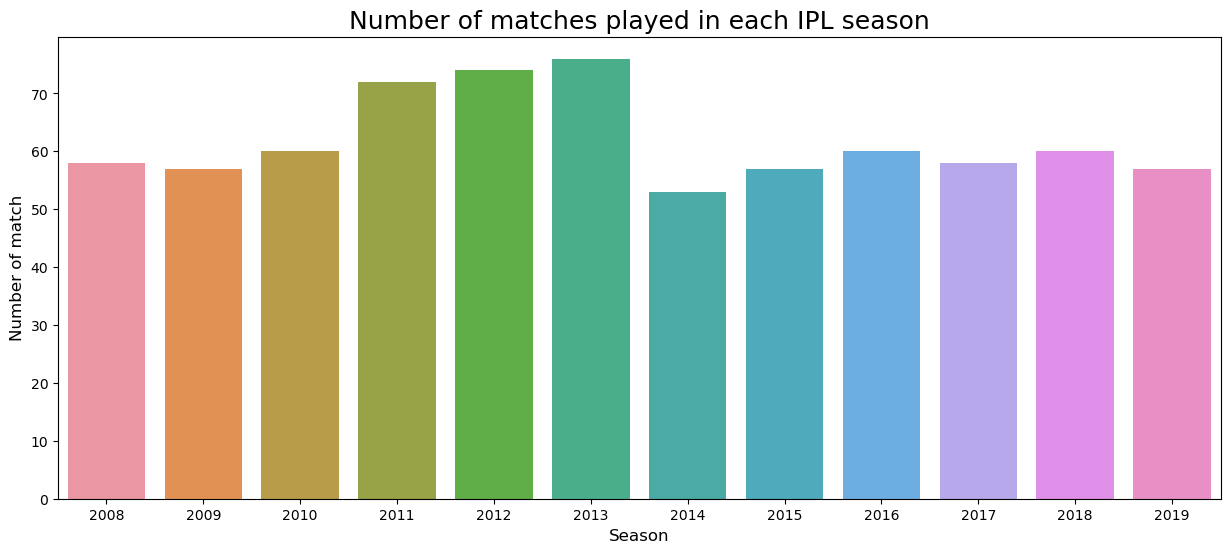

In [28]:
plt.figure(figsize=(15,6))
sns.countplot(x='season', data = df, order = df['season'].value_counts().index.sort_values())
plt.title('Number of matches played in each IPL season', fontsize=18)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of match', fontsize=12)
plt.show()

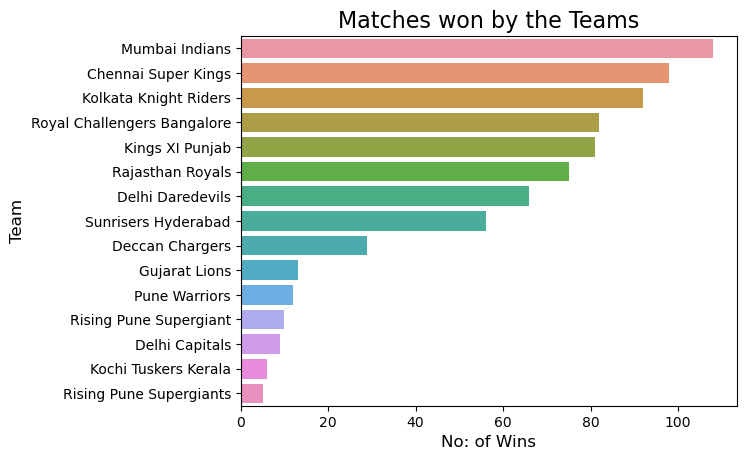

In [27]:
# Matches won by the team
sns.countplot(y='winner', data=df, order=df['winner'].value_counts().index)
plt.title('Matches won by the Teams',fontsize=16)
plt.xlabel('No: of Wins',fontsize=12)
plt.ylabel('Team',fontsize=12)
plt.show()

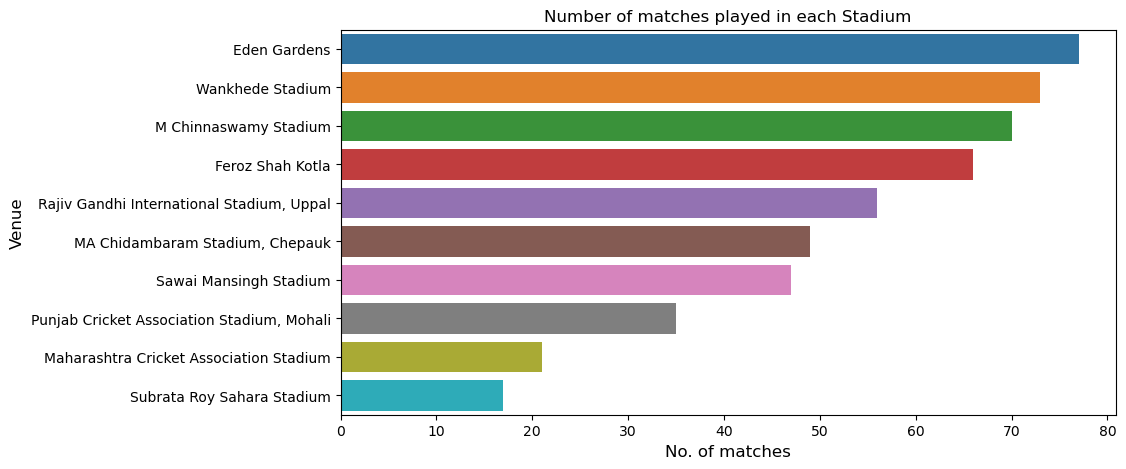

In [33]:
### No of matches played in stadium, Top 10
plt.figure(figsize=(10,5))
sns.countplot(y='venue', data=df, order = df['venue'].value_counts().iloc[:10].index)
plt.ylabel('Venue', fontsize=12)
plt.xlabel('No. of matches', fontsize=12)
plt.title('Number of matches played in each Stadium')
plt.show()

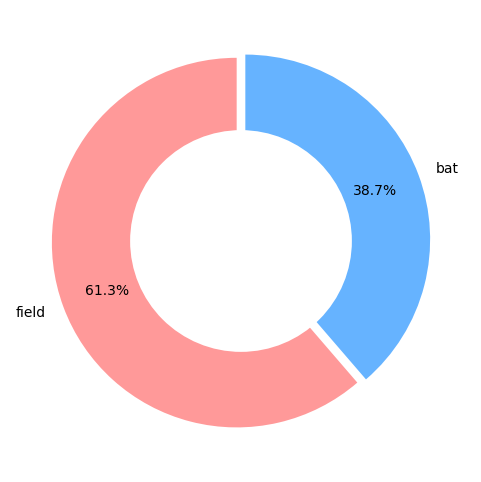

In [37]:
### Toss Decision
plt.figure(figsize=(6,6))
sizes = df.toss_decision.value_counts()
labels = df.toss_decision.value_counts().index
plt.pie(sizes,colors = ['#ff9999','#66b3ff'],
         labels=labels,
         autopct='%1.1f%%',
         startangle=90,
         pctdistance=0.75,
         explode = (0.025,0.025))
#draw white circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

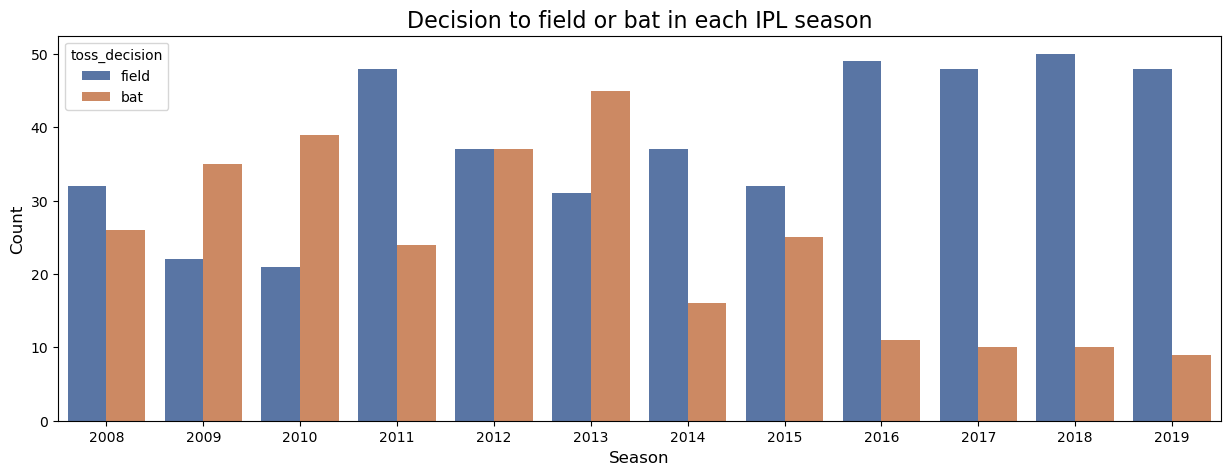

In [46]:
### Toss Decision to field or bat in each IPL season
plt.figure(figsize=(15,5))
sns.countplot(x='season', hue='toss_decision', data=df, order = df['season'].value_counts().index.sort_values(),palette='deep')
plt.xlabel('Season',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Decision to field or bat in each IPL season', fontsize=16)
plt.show()

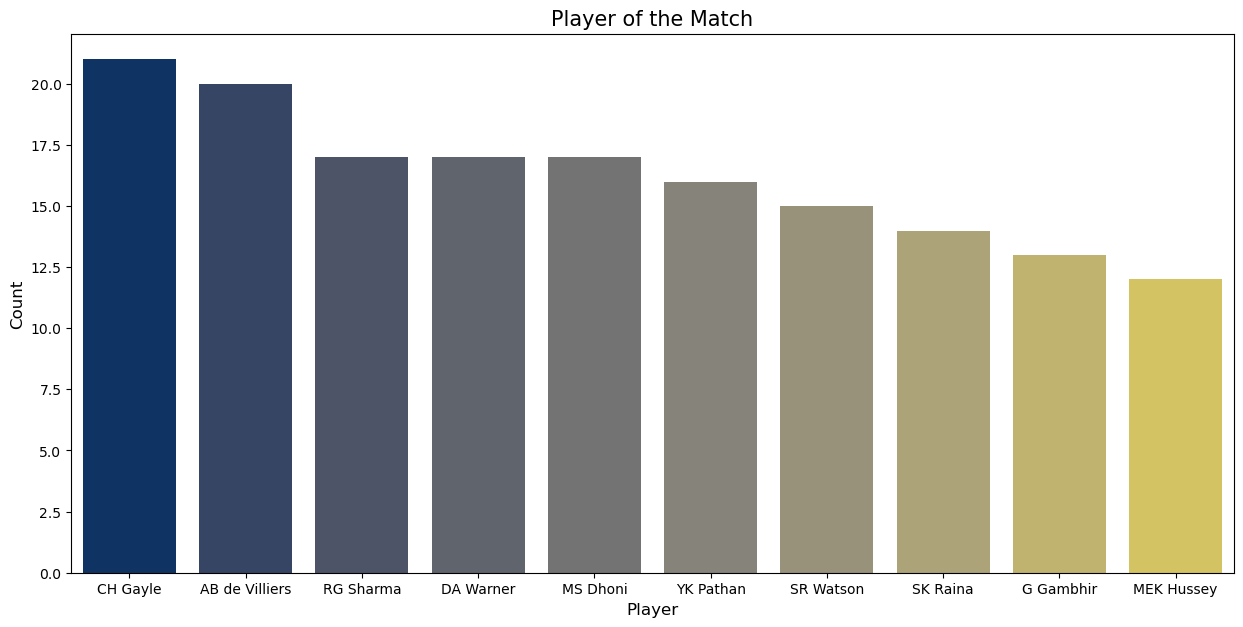

In [50]:
### Player of the Match
plt.figure(figsize=(15,7))
player_of_match=df['player_of_match'].value_counts()[:10]
sns.barplot(player_of_match.index, player_of_match.values, palette='cividis')

plt.title("Player of the Match",fontsize=15)
plt.xlabel('Player',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()